In [1]:
import pandas as pd

# Step - 1 : Introduction

### Data visualization and pre-processing of Aspiring Minds' Employability Outcomes 2015 (AMEO 2015) Dataset using Python.



#### About the dataset

Aspiring Minds' Employability Outcomes 2015 (AMEO 2015), a unique dataset which provides engineering graduates' employment outcomes (salaries, job titles and job locations) together with standardized assessment scores in three fundamental areas - cognitive skills, technical skills and personality. Coupled with biodata information, AMEO 2015 provides an opportunity for a unique and comprehensive study of the entry level labor market.

The dataset used for this project can be found using below link :
https://drive.google.com/file/d/1mV_ifvzzrlPWgdSzrwW5ZK-aF3S9tydZ/view

Here are a few important pre-processing operations done in this project:

1.Removing outliers: rows with salary > 10,00,000 is less than 1% of the data. So these rows were removed.

2.Only year from the DOB column is retained.

3.New columns GradAge and 12GradAge were introduced indicating the age of person during graduation and 12th graduation.

4.Missing values indicated by -1 was replaced with 0.

5.12board: The most frequent boards are “cbse”, “state”, “icse” and “n/a”. We reduced each to one of (cbse, state, n/a, icse) and then one-hot-encoded them.

6.The specialization column data was mapped to ‘CS’,’EC’,’ME’,’EL’,’CE’ and other.

7.CollegeGPA was converted from 10 point scale to 100 point scale.

8.Unnecessary columns such as JobCity,DOL,DOJ etc were dropped.

9.Categorical data such as gender,specialization,degree,12board was one hot encoded

# Step : 2

In [2]:
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx',index_col='Unnamed: 0')

In [3]:
print(df.shape)
df.head()

(3998, 38)


,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
print(df.columns)

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


In [5]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


# Step : 3

In [6]:
df.set_index("ID" ,inplace=True)
df.head(5)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Removing outliers

Salary >10,00,000 is very rare, especially in the first job. So these are considered as outliers and removed.

In [7]:
# row in which value of 'salary less than certian amount
for i in range(1,8):
    seriesObj = df.apply(lambda x: True if x['Salary'] <= 250000*i  else False , axis=1)
    # Count number of True in series
    numOfRows = len(seriesObj[seriesObj == True].index)
 
    print('Number of Rows in dataframe in which Salary %d  : '%((250000*i)), numOfRows)

Number of Rows in dataframe in which Salary 250000  :  1710
Number of Rows in dataframe in which Salary 500000  :  3683
Number of Rows in dataframe in which Salary 750000  :  3929
Number of Rows in dataframe in which Salary 1000000  :  3962
Number of Rows in dataframe in which Salary 1250000  :  3975
Number of Rows in dataframe in which Salary 1500000  :  3981
Number of Rows in dataframe in which Salary 1750000  :  3982


In [8]:
indexNames = df[ df['Salary'] > 1000000 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.shape

(3962, 37)

In [9]:
df['DOB']=pd.to_datetime(df['DOB'])
df['Dyear']=df['DOB'].dt.year
df.drop(columns=['DOB'],axis=1,inplace=True)

df['12graduation']=pd.to_datetime(df['12graduation'])
df['12gyear']=df['12graduation'].dt.year
df.drop(columns=['12graduation'],axis=1,inplace=True)

df['GraduationYear']=pd.to_datetime(df['GraduationYear'])
df['gyear']=df['GraduationYear'].dt.year
df.drop(columns=['GraduationYear'],axis=1,inplace=True)

df['12GradAge']=abs(df['12gyear']-df['Dyear'])
df['GradAge']=abs(df['gyear']-df['Dyear'])

### Dropping the collegeID,collegeCityID and DOB columns since they are unnecessary for our analysis.

In [10]:
df.drop(columns=['CollegeID','CollegeCityID'],axis=1,inplace=True)
df.drop(columns=['12gyear', 'gyear','Dyear'],axis=1,inplace=True)

In [11]:
(df == 0).astype(int).sum(axis=0) #counting the number of 0's per column

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
10percentage                0
10board                   344
12percentage                0
12board                   353
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier          2771
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
12GradAge                   0
GradAge   

In [12]:
df.isin([-1, 'NaN']).sum() #finding number of null values

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   458
Gender                      0
10percentage                0
10board                     0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
English                     0
Logical                     0
Quant                       0
Domain                    244
ComputerProgramming       863
ElectronicsAndSemicon    2827
ComputerScience          3066
MechanicalEngg           3731
ElectricalEngg           3801
TelecomEngg              3590
CivilEngg                3920
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
12GradAge                   0
GradAge   

In [13]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [14]:
replace_list_state = ['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec', 'all india board',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 'cicse',
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
       'isc board , new delhi', 'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 'central board of secondary education, new delhi',
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 'cbese',
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate']

In [15]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    df['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    df['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    df['12board'].replace(i,'icse',inplace=True)
    
df['12board'].replace(0,'n/a',inplace=True)

df['12board'].unique()

array(['state'], dtype=object)

In [16]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

<AxesSubplot:>

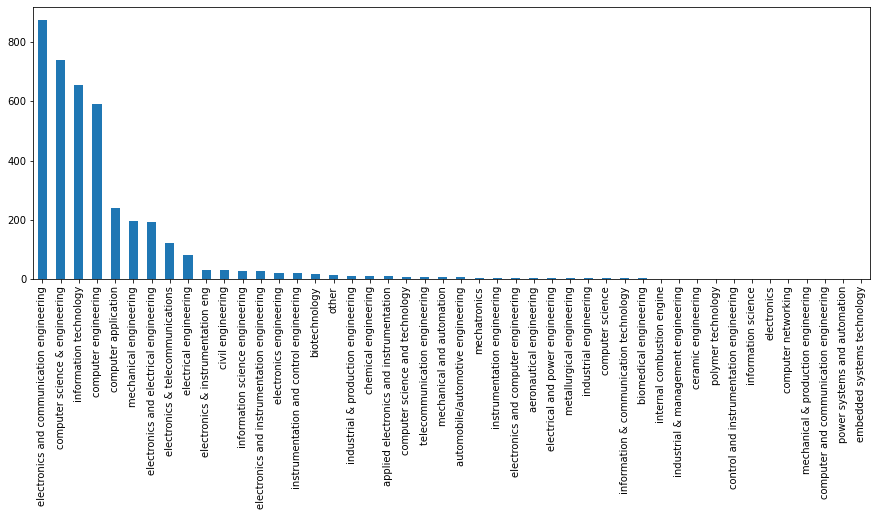

In [17]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

In [18]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC','computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS','internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


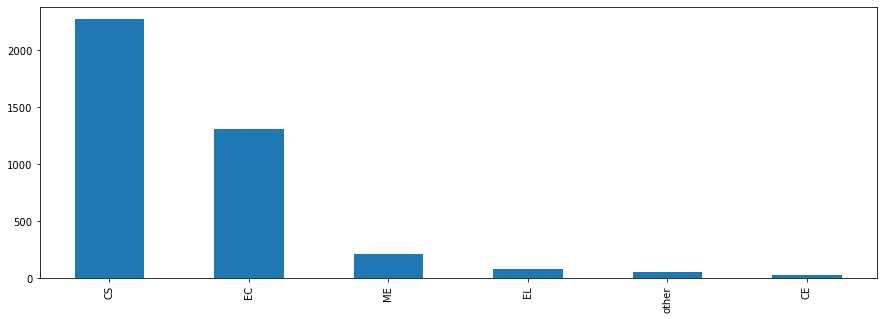

In [19]:
df['Specialization'] = df['Specialization'].map(specialization_map)

df['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(df['Specialization'].unique())

<AxesSubplot:ylabel='Frequency'>

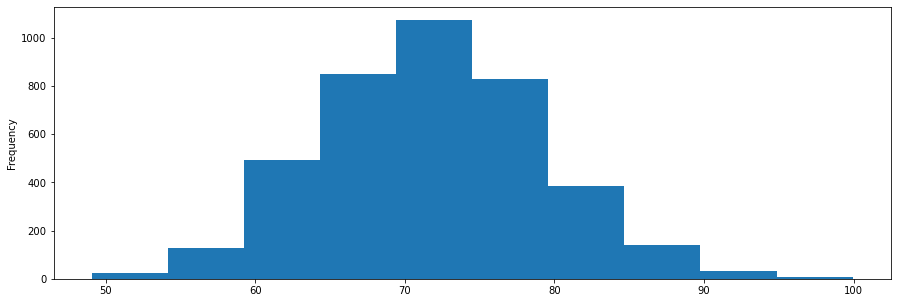

In [20]:
df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] *= 10
df['collegeGPA'].plot(kind='hist', figsize=(15,5))

### removing the other depts


In [21]:
clean_data=pd.DataFrame()
clean_data=df[df['ComputerScience']>0]

In [22]:
clean_data.shape

(896, 34)

In [23]:
clean_data['Specialization'].unique()

array(['EC', 'CS', 'ME', 'other', 'EL'], dtype=object)

In [24]:
category_list=[ 'Gender', '12board', 'Degree','Specialization']
numeric_list=[ 'Salary','10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '12GradAge',
       'GradAge']

In [25]:
clean_data.drop(columns=['DOJ', 'DOL', 'Designation', 'JobCity','CollegeTier',  
       'CollegeCityTier', '10board','CollegeState','ElectronicsAndSemicon',
        'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
clean_data.columns

Index(['Salary', 'Gender', '10percentage', '12percentage', '12board', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       '12GradAge', 'GradAge'],
      dtype='object')

In [27]:
clean_data.to_csv('partial_clean_data.csv', index=False) #data without one hot encoding. for visualization purposes

### One hot encoding the categorical columns



In [28]:
for feature in category_list:
    clean_data = pd.get_dummies(clean_data, prefix=feature, columns=[feature])

### Categorizing the salary to 5 categories

In [29]:
from sklearn import preprocessing

#z=pd.DataFrame(X_train_scaled)
#y=pd.DataFrame(Y_train_scaled)
 
 
#set up bins
bin = [0,.25,.5,.75,1]

#use pd.cut function can attribute the values into its specific bins
category = pd.qcut(clean_data['Salary'],bin)
category = category.to_frame()
category.columns = ['Sal']

#concatenate age and its bin
y_cat = pd.concat([clean_data['Salary'],category],axis = 1)

#labelencode
le = preprocessing.LabelEncoder()
le.fit(y_cat['Sal'])
le.classes_
Y_train_cat=le.transform(y_cat['Sal'])

In [30]:
Y_train_cat

array([2, 2, 2, 2, 3, 3, 1, 3, 0, 1, 0, 3, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1,
       2, 2, 0, 2, 2, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 3, 0, 2, 2, 1, 3, 0, 1, 0, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 2,
       2, 3, 1, 2, 2, 2, 3, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 0, 3, 0, 0, 1,
       3, 1, 2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 3, 3, 3, 0, 1, 2,
       0, 1, 0, 0, 2, 1, 1, 3, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 3,
       3, 3, 3, 2, 2, 3, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0,
       3, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 0, 1, 1, 3, 0, 1, 2, 1, 2, 3, 2,
       3, 0, 2, 3, 1, 2, 1, 0, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       2, 3, 0, 1, 2, 3, 2, 0, 3, 1, 2, 0, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0,
       2, 0, 2, 1, 3, 2, 3, 3, 3, 3, 0, 2, 0, 1, 0, 3, 3, 2, 3, 0, 0, 0,
       2, 3, 3, 0, 0, 1, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 0, 0, 0, 3, 2, 0,
       3, 1, 1, 2, 0, 3, 1, 0, 2, 3, 2, 0, 0, 0, 1, 3, 2, 0, 3, 0, 1, 3,
       3, 3, 3, 0, 0, 1, 3, 1, 0, 3, 1, 0, 2, 3, 2,

In [31]:
X_train=pd.DataFrame(clean_data.drop(columns=['Salary'],axis=1))
Y_train=pd.DataFrame(clean_data['Salary'])
Y_train_cat=pd.DataFrame(Y_train_cat)
print(X_train.shape,Y_train.shape,Y_train_cat.shape)

(896, 28) (896, 1) (896, 1)


In [32]:
X_train.to_csv('X_train.csv', index=False)
Y_train.to_csv('Y_train.csv',header=True, index=False, index_label='Salary')
Y_train_cat.to_csv('Y_train_cat.csv',header=True, index=False, index_label='Salary')
clean_data.to_csv('clean_data.csv', index=False)

# Step : 4

# Bivariate Analysis

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

pd.set_option('display.max_columns', None)

In [34]:
data=pd.read_csv('partial_clean_data.csv')

In [35]:
data.columns

Index(['Salary', 'Gender', '10percentage', '12percentage', '12board', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       '12GradAge', 'GradAge'],
      dtype='object')

In [36]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))

Number of male candidates : 677
Number of female candidates : 219
Male to Female ratio: 3.09


<AxesSubplot:>

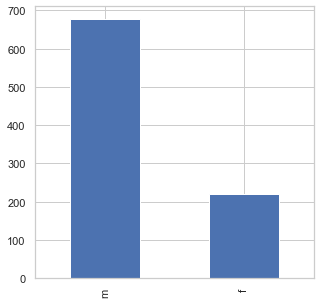

In [37]:
data['Gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

Text(0.5, 0.98, 'Salary levels by gender')

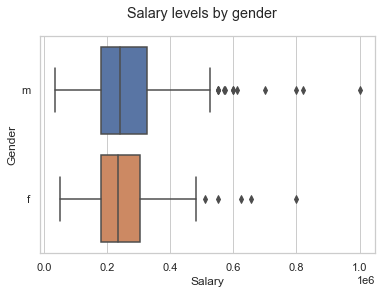

In [38]:
#boxplot visualization of salary levels by gender
#median salary of males is slightly greater than that of females.
#higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')

(array([148., 263., 247., 192.,  28.,  11.,   3.,   2.,   1.,   1.]),
 array([  35000.,  131500.,  228000.,  324500.,  421000.,  517500.,
         614000.,  710500.,  807000.,  903500., 1000000.]),
 <BarContainer object of 10 artists>)

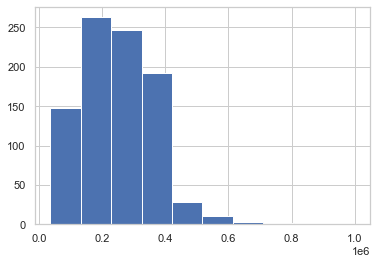

In [39]:
#histogram of salary data
plt.hist(data['Salary'],bins=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 12Board')

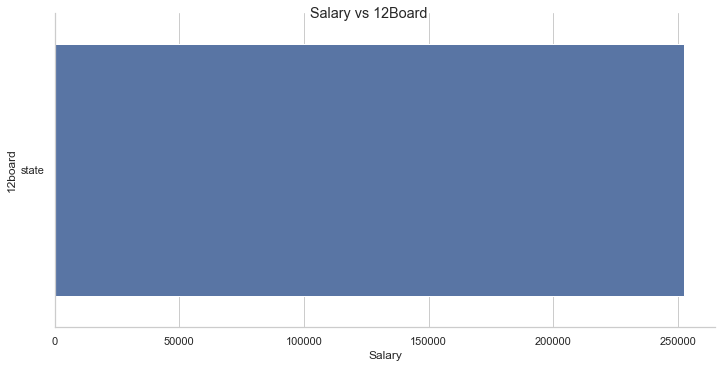

In [40]:
#bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars
#Students of icse board tend to earn higher salaries than the other two.
sns.factorplot(x='Salary', y='12board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

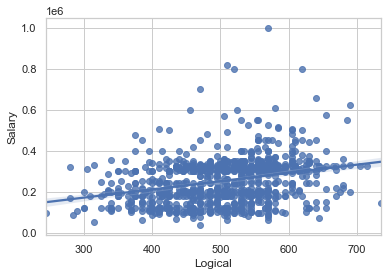

In [41]:
sns.regplot(x='Logical', y='Salary', data=data)

In [42]:
#creating new columns 
data['AverageScore']=(data['Logical']+data['Quant']+data['English'])/3
data['Acadperf']=data['10percentage']+data['12percentage']+data['collegeGPA']/3

<AxesSubplot:xlabel='AverageScore', ylabel='Salary'>

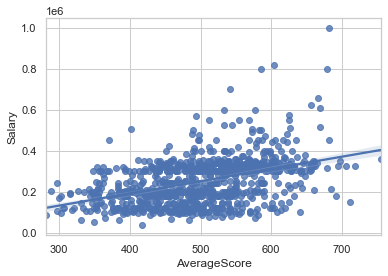

In [43]:
#lpositive correlation between salary and average(logical+quant+english) score is indicated
sns.regplot(x='AverageScore', y='Salary', data=data)

<AxesSubplot:>

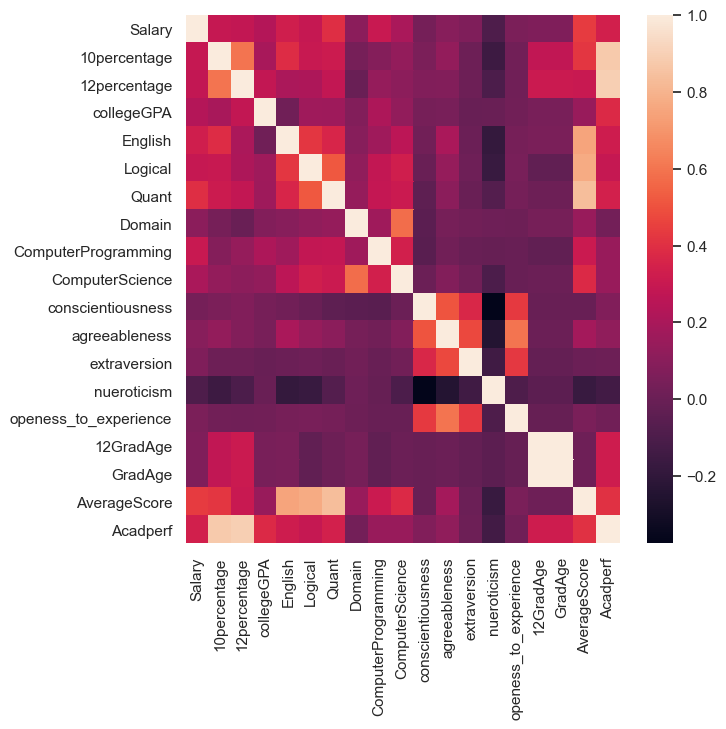

In [44]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(data.corr()) # plotting the correlation matrix of the dataset


<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

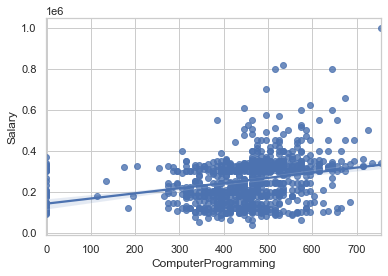

In [45]:
#positive correlation between salary and computer programming skills
sns.regplot(x='ComputerProgramming', y='Salary', data=data)

Text(0.5, 0.98, 'Salary levels by specialization')

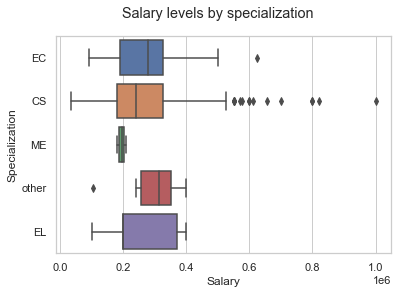

In [46]:
#boxplot visualization of salary and specialization
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
#the median salary of EC dept is higher than others.
sns.boxplot(x='Salary', y = 'Specialization', data=data)
plt.suptitle('Salary levels by specialization')

# Step : 5

# Research Questions

###### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [47]:
dataset = pd.read_excel('__research__.xlsx')

In [48]:
dataset.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.5,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
1,train,989860,250000,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,2010,90.1,state board,12832,2,B.Tech/B.E.,computer science & engineering,67.70,12832,0,Karnataka,2014,525,530,595,0.486747,485,-1,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.1601,-0.4776
2,train,940402,300000,2014-10-01,2015-04-01 00:00:00,java developer,Chennai,m,1993-06-30,85.30,state board,2010,88.3,state board,434,2,B.Tech/B.E.,computer science & engineering,85.00,434,1,Tamil Nadu,2014,370,375,325,0.356536,315,-1,346,-1,-1,-1,-1,1.8517,1.5444,0.3174,0.3995,0.6721
3,train,1237891,250000,2015-06-01,present,software developer,Mangalore,m,1993-01-15,84.40,cbse,2011,73.2,cbse,272,2,B.Tech/B.E.,computer science & engineering,70.00,272,0,Punjab,2015,570,410,535,0.670743,455,-1,-1,-1,-1,-1,-1,-0.0154,0.8784,0.0100,-0.7415,-0.2859
4,train,1098869,300000,2014-08-01,present,assistant software engineer,Bangalore,m,1992-09-26,84.83,cbse,2010,82.4,cbse,903,2,B.Tech/B.E.,computer science & engineering,74.14,903,0,Uttar Pradesh,2014,665,595,705,0.744758,505,-1,438,-1,-1,-1,-1,-0.4463,0.2124,0.3174,-1.5021,-0.2859


In [49]:
dataset['Specialization'].value_counts()

computer science & engineering    115
Name: Specialization, dtype: int64

In [50]:
dataset.set_index("ID" ,inplace=True)
dataset.head(5)

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
947847,train,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.5,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
989860,train,250000,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,2010,90.1,state board,12832,2,B.Tech/B.E.,computer science & engineering,67.70,12832,0,Karnataka,2014,525,530,595,0.486747,485,-1,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.1601,-0.4776
940402,train,300000,2014-10-01,2015-04-01 00:00:00,java developer,Chennai,m,1993-06-30,85.30,state board,2010,88.3,state board,434,2,B.Tech/B.E.,computer science & engineering,85.00,434,1,Tamil Nadu,2014,370,375,325,0.356536,315,-1,346,-1,-1,-1,-1,1.8517,1.5444,0.3174,0.3995,0.6721
1237891,train,250000,2015-06-01,present,software developer,Mangalore,m,1993-01-15,84.40,cbse,2011,73.2,cbse,272,2,B.Tech/B.E.,computer science & engineering,70.00,272,0,Punjab,2015,570,410,535,0.670743,455,-1,-1,-1,-1,-1,-1,-0.0154,0.8784,0.0100,-0.7415,-0.2859
1098869,train,300000,2014-08-01,present,assistant software engineer,Bangalore,m,1992-09-26,84.83,cbse,2010,82.4,cbse,903,2,B.Tech/B.E.,computer science & engineering,74.14,903,0,Uttar Pradesh,2014,665,595,705,0.744758,505,-1,438,-1,-1,-1,-1,-0.4463,0.2124,0.3174,-1.5021,-0.2859


In [51]:
dataset.drop('Unnamed: 0',axis=1)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
947847,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
989860,250000,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,2010,90.10,state board,12832,2,B.Tech/B.E.,computer science & engineering,67.70,12832,0,Karnataka,2014,525,530,595,0.486747,485,-1,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.1601,-0.4776
940402,300000,2014-10-01,2015-04-01 00:00:00,java developer,Chennai,m,1993-06-30,85.30,state board,2010,88.30,state board,434,2,B.Tech/B.E.,computer science & engineering,85.00,434,1,Tamil Nadu,2014,370,375,325,0.356536,315,-1,346,-1,-1,-1,-1,1.8517,1.5444,0.3174,0.3995,0.6721
1237891,250000,2015-06-01,present,software developer,Mangalore,m,1993-01-15,84.40,cbse,2011,73.20,cbse,272,2,B.Tech/B.E.,computer science & engineering,70.00,272,0,Punjab,2015,570,410,535,0.670743,455,-1,-1,-1,-1,-1,-1,-0.0154,0.8784,0.0100,-0.7415,-0.2859
1098869,300000,2014-08-01,present,assistant software engineer,Bangalore,m,1992-09-26,84.83,cbse,2010,82.40,cbse,903,2,B.Tech/B.E.,computer science & engineering,74.14,903,0,Uttar Pradesh,2014,665,595,705,0.744758,505,-1,438,-1,-1,-1,-1,-0.4463,0.2124,0.3174,-1.5021,-0.2859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233727,300000,2015-06-01,present,programmer analyst,Gurgaon,m,1994-06-30,81.00,cbse,2011,80.20,cbse,272,2,B.Tech/B.E.,computer science & engineering,77.04,272,0,Punjab,2015,370,590,605,0.991231,555,-1,592,-1,-1,-1,-1,-1.3080,0.2124,1.3933,2.9349,0.4805
654308,300000,2013-11-01,present,business analyst,Hyderabad,f,1991-07-28,76.00,state board,2009,88.00,state board,9812,2,B.Tech/B.E.,computer science & engineering,67.00,9812,1,Telangana,2013,520,620,665,0.864685,525,-1,-1,-1,-1,-1,-1,-0.1590,0.3789,0.4711,-0.6147,0.0973
932788,300000,2014-06-01,present,java developer,Bangalore,f,1992-04-04,89.80,cbse,2010,87.20,cbse,6874,2,B.Tech/B.E.,computer science & engineering,78.12,6874,0,Uttarakhand,2014,475,640,460,0.744758,545,-1,438,-1,-1,-1,-1,-0.1590,-0.7866,-1.0659,-0.7415,-1.2440


In [52]:
dataset['Salary'].value_counts()

300000    73
275000    15
280000     8
250000     8
290000     4
260000     3
295000     2
285000     1
265000     1
Name: Salary, dtype: int64

In [53]:
dataset['Gender'].value_counts()

m    74
f    41
Name: Gender, dtype: int64

<AxesSubplot:>

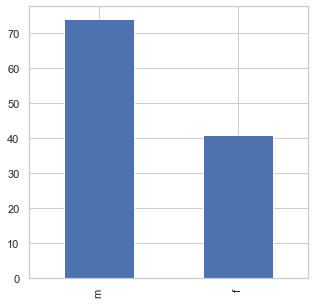

In [54]:
dataset['Gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

### There a relationship between gender and specialisation (i.e. the preference of Specialisation depend on the Gender)

# Step - 6 - Conclusion

We present in this work details of Aspiring Minds’ Employability Outcomes 2015 (AMEO 2015), the first dataset
to provide engineers’ employment outcomes (salaries, job
titles and job locations) together with standardized assessment scores in three fundamental areas - cognitive skills,
technical skills and personality. The dataset also contains
anonymized biodata, making it a rich source for a comprehensive study of the entry-level labor markets. We see it
being used in analyses which can inform policies on personnel selection and higher education. It can also be used to
model a variety of data-driven systems which can efficiently
match job seekers and job providers. Systems like these include accurate salary predictors, automated job counselors
and visualizations on how skills are distributed across geographies. We look forward to this dataset being utilized in
the design of a truly merit-driven labor market.


# Step - 7 

### (Bonus) Come up with some interesting conclusions or research questions.

For every engineer, it provides anonymized biodata information along with their respective skill scores and employment outcome information. For detailed information on each
attribute refer to Table 2 in Appendix A.
Specifically, the following information is available for everytechniques. The dataset has a variety of input formats,
including semi-structured text in the form of job titles, making it a rich instructional tool which students and professionals can readily relate to and learn from. It can also be used
to teach quantitative social science methods.


In [55]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,12GradAge,GradAge
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,84.30,"board ofsecondary education,ap",95.8,state,2,B.Tech/B.E.,CS,78.00,0,Andhra Pradesh,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,20,20
579905,500000,2013-09-01,present,assistant manager,Indore,m,85.40,cbse,85.0,state,2,B.Tech/B.E.,EC,70.06,0,Madhya Pradesh,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,19,19
810601,325000,2014-06-01,present,systems engineer,Chennai,f,85.00,cbse,68.2,state,2,B.Tech/B.E.,CS,70.00,0,Uttar Pradesh,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,22,22
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,78.00,cbse,76.8,state,2,B.Tech/B.E.,EC,73.90,0,Uttar Pradesh,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,21,21
1027655,300000,2014-06-01,present,system engineer,Hyderabad,m,89.92,state board,87.0,state,2,B.Tech/B.E.,EC,76.32,0,Karnataka,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,22,22


In [56]:
train_data = pd.read_excel('train (1).xlsx',index_col='ID')

In [57]:
train_data.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [58]:
train_data.drop('Unnamed: 0',axis=1)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


In [59]:
train_data.columns

Index(['Unnamed: 0', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [60]:
y = train_data['Salary']
y.head()

ID
203097     420000
579905     500000
810601     325000
267447    1100000
343523     200000
Name: Salary, dtype: int64

In [61]:
X = train_data.drop('Salary',axis = 1)
X.head()

,Unnamed: 0,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,train,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,train,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,train,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,train,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,train,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [62]:
train_data.isna().sum()

Unnamed: 0               0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [63]:
X.dtypes

Unnamed: 0                       object
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64


In [64]:
train_data.drop('Unnamed: 0',axis=1)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


In [65]:
X = pd.get_dummies(X, columns = ['Designation'])

In [66]:
X = pd.get_dummies(X, columns = ['DOL'])
X = pd.get_dummies(X, columns = ['JobCity'])
X = pd.get_dummies(X, columns = ['Gender'])
X = pd.get_dummies(X, columns = ['10board'])
X = pd.get_dummies(X, columns = ['12board'])
X = pd.get_dummies(X, columns = ['Degree'])
X = pd.get_dummies(X, columns = ['Specialization'])
X = pd.get_dummies(X, columns = ['CollegeState'])

In [67]:
X.head()

Unnamed: 0        DOJ        DOB  10percentage  12graduation  \
ID                                                                    
203097      train 2012-06-01 1990-02-19          84.3          2007   
579905      train 2013-09-01 1989-10-04          85.4          2007   
810601      train 2014-06-01 1992-08-03          85.0          2010   
267447      train 2011-07-01 1989-12-05          85.6          2007   
343523      train 2014-03-01 1991-02-27          78.0          2008   

        12percentage  CollegeID  CollegeTier  collegeGPA  CollegeCityID  \
ID                                                                        
203097          95.8       1141            2       78.00           1141   
579905          85.0       5807            2       70.06           5807   
810601          68.2         64            2       70.00             64   
267447          83.6       6920            1       74.64           6920   
343523          76.8      11368            2       73.90          11368   

        CollegeCityTier  GraduationYear  English  Logical  Quant    Domain  \
ID                                                                           
203097                0            2011      515      585    525  0.635979   
579905                0            2012      695      610    780  0.960603   
810601                0            2014      615      545    370  0.450877   
267447                1            2011      635      585    625  0.974396   
343523                0            2012      545      625    465  0.124502   

        ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
ID                                                                    
203097                  445                     -1               -1   
579905                   -1                    466               -1   
810601                  395                     -1               -1   
267447                  615                     -1               -1   
343523                   -1                    233               -1   

        MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
ID                                                               
203097              -1              -1           -1         -1   
579905              -1              -1           -1         -1   
810601              -1              -1           -1         -1   
267447              -1              -1           -1         -1   
343523              -1              -1           -1         -1   

        conscientiousness  agreeableness  extraversion  nueroticism  \
ID                                                                    
203097             0.9737         0.8128        0.5269      1.35490   
579905            -0.7335         0.3789        1.2396     -0.10760   
810601             0.2718         1.7109        0.1637     -0.86820   
267447             0.0464         0.3448       -0.3440     -0.40780   
343523            -0.8810        -0.2793       -1.0697      0.09163   

        openess_to_experience  Designation_.net developer  \
ID                                                          
203097                -0.4455                           0   
579905                 0.8637                           0   
810601                 0.6721                           0   
267447                -0.9194                           0   
343523                -0.1295                           0   

        Designation_.net web developer  Designation_account executive  \
ID                                                                      
203097                               0                              0   
579905                               0                              0   
810601                               0                              0   
267447                               0                              0   
343523                               0                              0   

        Designation_account manager  

In [68]:
X = X.drop('Unnamed: 0',axis=1)

In [69]:
X.dtypes

DOJ                             datetime64[ns]
DOB                             datetime64[ns]
10percentage                           float64
12graduation                             int64
12percentage                           float64
                                     ...      
CollegeState_Telangana                   uint8
CollegeState_Union Territory             uint8
CollegeState_Uttar Pradesh               uint8
CollegeState_Uttarakhand                 uint8
CollegeState_West Bengal                 uint8
Length: 1545, dtype: object

In [75]:
X = X.drop('DOJ',axis=1)

In [76]:
X = X.drop('DOB',axis=1)

In [77]:
X.dtypes

10percentage                    float64
12graduation                      int64
12percentage                    float64
CollegeID                         int64
CollegeTier                       int64
                                 ...   
CollegeState_Telangana            uint8
CollegeState_Union Territory      uint8
CollegeState_Uttar Pradesh        uint8
CollegeState_Uttarakhand          uint8
CollegeState_West Bengal          uint8
Length: 1543, dtype: object

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [83]:
train = scaler.fit_transform(x_train)

In [84]:
test = scaler.transform(x_test)

In [91]:
train

array([[ 1.03273818,  0.54867813,  1.51833609, ..., -0.54916965,
        -0.17402157, -0.22645541],
       [-1.41324071, -0.67707993, -1.31268063, ..., -0.54916965,
        -0.17402157, -0.22645541],
       [-0.49980461, -0.0642009 , -1.03048926, ..., -0.54916965,
        -0.17402157, -0.22645541],
       ...,
       [-0.19532591,  0.54867813,  0.5079089 , ...,  1.82093094,
        -0.17402157, -0.22645541],
       [-0.15472875, -0.0642009 , -0.81201851, ...,  1.82093094,
        -0.17402157, -0.22645541],
       [ 1.42856049, -0.67707993,  0.59893838, ..., -0.54916965,
        -0.17402157, -0.22645541]])

In [92]:
test

array([[ 0.29184001, -1.28995895, -1.11241578, ..., -0.54916965,
        -0.17402157, -0.22645541],
       [ 1.59094912,  0.54867813,  0.59893838, ..., -0.54916965,
        -0.17402157, -0.22645541],
       [-0.60129751,  1.77443618, -1.0577981 , ..., -0.54916965,
         5.74641424, -0.22645541],
       ...,
       [-1.81921231, -1.90283798, -1.94988697, ..., -0.54916965,
         5.74641424, -0.22645541],
       [-0.04308656, -1.28995895,  0.38046763, ..., -0.54916965,
        -0.17402157,  4.41588043],
       [-0.29681881, -1.28995895, -1.31268063, ..., -0.54916965,
        -0.17402157, -0.22645541]])